In [13]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


Importing libraries :

In [14]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, classification_report, make_scorer, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler

In [16]:
import io
 
df = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Information on the data :

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Checks for missing data :

In [18]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

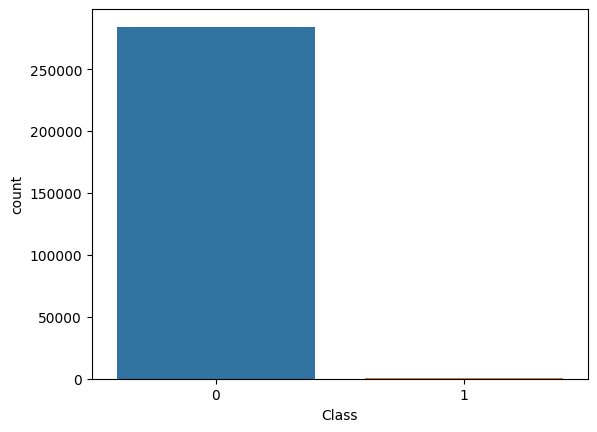

In [19]:
sns.countplot(x = 'Class', data = df);

In [20]:
df['Class'].value_counts(normalize = True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

Anomaly detection problems are characterised by the over-representation of one class compared to the other. It can be seen that this is the case here.

We delete the Time variable which is not relevant here

In [22]:
df = df.drop(['Time'], axis = 1)

The algorithms used in the next steps adopt by convention the label -1 for outliers and 1 for inliers. For this reason we make the following changes:

In [23]:
df['Class'].replace({1: -1}, inplace=True)
df['Class'].replace({0: 1}, inplace=True)

In [24]:
X = df.drop('Class', axis = 1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

First Model : Isolation Forest

In [25]:
isof = IsolationForest(n_estimators = 100, contamination = 0.03, n_jobs = -1)
isof.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.03, n_jobs=-1)

In [27]:
y_pred = isof.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classes réelles'], colnames=['Classes prédites'])

Classes prédites,-1,1
Classes réelles,,
-1,88,19
1,1703,55152


In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.05      0.82      0.09       107
           1       1.00      0.97      0.98     56855

    accuracy                           0.97     56962
   macro avg       0.52      0.90      0.54     56962
weighted avg       1.00      0.97      0.98     56962



We will now try to improve the recall by playing on the contamination rate.

In [30]:
skf = StratifiedKFold(n_splits=3) 
folds = list(skf.split(X_train, y_train))
forest = IsolationForest()

In [31]:
resc = make_scorer(recall_score,pos_label=-1)
params = {'contamination': np.linspace(0.01, 0.05, 10), 'n_estimators': [100,200,300]}
search = GridSearchCV(estimator=forest, param_grid=params, scoring=resc, cv=folds, n_jobs=-1)
search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


GridSearchCV(cv=[(array([ 75948,  75949,  75950, ..., 227842, 227843, 227844]),
                  array([    0,     1,     2, ..., 75946, 75947, 76510])),
                 (array([     0,      1,      2, ..., 227842, 227843, 227844]),
                  array([ 75948,  75949,  75950, ..., 151908, 151909, 151910])),
                 (array([     0,      1,      2, ..., 151908, 151909, 151910]),
                  array([147555, 148058, 148267, ..., 227842, 227843, 227844]))],
             estimator=IsolationForest(), n_jobs=-1,
             param_grid={'contamination': array([0.01      , 0.01444444, 0.01888889, 0.02333333, 0.02777778,
       0.03222222, 0.03666667, 0.04111111, 0.04555556, 0.05      ]),
                         'n_estimators': [100, 200, 300]},
             scoring=make_scorer(recall_score, pos_label=-1))

In [32]:
optimal_forest = search.best_estimator_
y_pred = optimal_forest.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classes réelles'], colnames=['Classes prédites'])

Classes prédites,-1,1
Classes réelles,,
-1,89,18
1,2856,53999


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.03      0.83      0.06       107
           1       1.00      0.95      0.97     56855

    accuracy                           0.95     56962
   macro avg       0.51      0.89      0.52     56962
weighted avg       1.00      0.95      0.97     56962



This time the model has a better recall score.

One Class SVM

We will first keep only the data not polluted by anomalies.

We will therefore select only the labels that correspond to 1, then we will create a list of indexes to be able to recover the explanatory variables of these indexes and finally we will recover these explanatory variables in a new DataFrame.

In [34]:
y_inliers = y_train[y_train.values==1]
liste = list(y_inliers.index.values)
X_train_inliers = X_train.loc[liste]

Normalization

In [35]:
scaling = scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X_train_inliers)
X_train_inliers =scaling.transform(X_train_inliers)
X_test = scaling.transform(X_test)

In [36]:
clf_osvm = svm.OneClassSVM(nu = 0.005, kernel = 'rbf', gamma= 'scale')
clf_osvm.fit(X_train_inliers)

OneClassSVM(nu=0.005)

In [37]:
y_pred = clf_osvm.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['Classes réelles'], colnames=['Classes prédites'])

Classes prédites,-1,1
Classes réelles,,
-1,81,26
1,309,56546


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.21      0.76      0.33       107
           1       1.00      0.99      1.00     56855

    accuracy                           0.99     56962
   macro avg       0.60      0.88      0.66     56962
weighted avg       1.00      0.99      1.00     56962

